## Graph Optimization Problems

In [1]:
# define Node, Edge, WeightedEdge classes

class Node(object):
    def __init__(self, name) -> None:
        """Assumes name is a string"""
        self.name = name
    def getName(self):
        return self.name
    def __str__(self) -> str:
        return self.name

class Edge(object):
    def __init__(self, src, dest) -> None:
        """Assumes src and dest are nodes"""
        self.src = src
        self.dest = dest
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest
    def __str__(self) -> str:
        return self.src.getName() + "->" + self.dest.getName()
    
class WeightedEdge(Edge):
    def __init__(self, src, dest, weight = 1.0) -> None:
        """Assumes src and dest are nodes, weight a number"""
        self.src = src
        self.dest = dest
        self.weight = weight
    def getWeight(self):
        return self.weight
    def __str__(self) -> str:
        return self.src.getName() + "->(" + str(self.weight) + ")" + self.dest.getName()        

In [2]:
# define Graph classes

class Digraph(object):
    # nodes is a list of the nodes in the graph
    # edges is a dict mapping each node to a list of its children
    def __init__(self):
        self.nodes = []
        self.edges = {}  # consists of source:destinations pairs where key is a single node but value is a list of nodes
    def addNode(self, node):
        if node in self.nodes:
            raise ValueError("Duplicate Node")
        else:
            self.nodes.append(node)
            self.edges[node] = []  # create an empty list as children of the new node
    def addEdge(self, edge):
        src = edge.getSource()
        dest = edge.getDestination()
        if not (src in self.nodes and dest in self.nodes):
            raise ValueError("Node not in graph")
        self.edges[src].append(dest)
    def childrenOf(self, node):
        return self.edges[node]
    def hasNode(self, node):
        return node in self.nodes
    def __str__(self):
        result = ""
        for src in self.nodes:
            for dest in self.edges[src]:
                result = result + src.getName() + "->" + dest.getName() + "\n"
        return result[:-1]  # omit final newline
                
class Graph(Digraph):
    def addEdge(self, edge):
        Digraph.addEdge(self, edge)
        rev = Edge(edge.getDestination(), edge.getSource())
        Digraph.addEdge(self, rev)

In [3]:
def printPath(path):
    """Assumes path is a list of nodes such as ["apple", "orange", "kiwi"]"""
    result = ""
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path) - 1:
            result = result + "->"
    return result

In [4]:
# Demonstration of printPath() function
path = ["apple", "orange", "kiwi"]
printPath(path)

'apple->orange->kiwi'

# Depth-First Search Algorithm

In [5]:
# Define a depth-first-search (DFS) algorithm, which is recursive
def DFS(graph, start, end, path, shortest, toPrint=False):
    """Assumes graph is a Digraph; start and end are nodes;
        path and shortest are list of nodes
        Returns a shortest path from start to end in graph"""
    path = path + [start]
    if toPrint:
        print("Current DFS path:", printPath(path))
    if start == end:
        return path
    for node in graph.childrenOf(start):
        if node not in path:  # avoid cycles
            if shortest == None or len(path) < len(shortest):
                newPath = DFS(graph, node, end, path, shortest, toPrint)
            if newPath != None:
                shortest = newPath
    return shortest

# Define a shortest path solver function (NOT recursive but contains the DFS algorithm)
def shortestPath(graph, start, end, toPrint=False):
    """Assumes graph is a Digraph; start and end are nodes
        Returns a shortest path from start to end in graph"""
    return DFS(graph, start, end, [], None, toPrint)

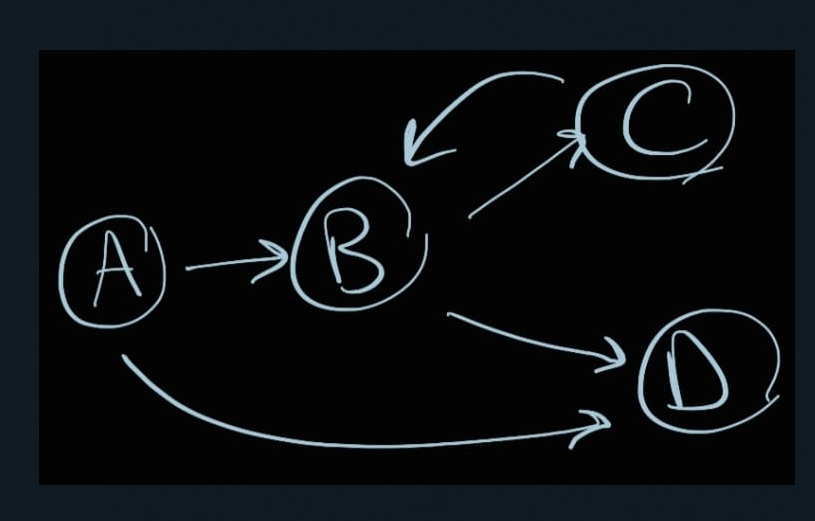

In [6]:
# Create nodes
A = Node("A")
B = Node("B")
C = Node("C")
D = Node("D")

# Create edges
AB = Edge(A, B)
AD = Edge(A, D)
BC = Edge(B, C)
BD = Edge(B, D)
CB = Edge(C, B)

# Create graph
mygraph = Digraph()

In [7]:
print(BC)

B->C


In [8]:
# Add nodes to mygraph
nodelist = [A, B, C, D]
for node in nodelist:
    mygraph.addNode(node)

# Add edges to mygraph
edgelist = [AB, AD, BC, BD, CB]
for edge in edgelist:
    mygraph.addEdge(edge)
    
print("Current graph:")
print(mygraph)

Current graph:
A->B
A->D
B->C
B->D
C->B


In [9]:
shortest_path_mygraph = shortestPath(mygraph, A, D, True)
print("Shortest path:", "(", shortest_path_mygraph[0], "->", shortest_path_mygraph[1], ")")

Current DFS path: A
Current DFS path: A->B
Current DFS path: A->B->C
Current DFS path: A->B->D
Current DFS path: A->D
Shortest path: ( A -> D )


# Breadth-First Search Algorithm

In [10]:
def BFS(graph, start, end, toPrint=False):
    """Assumes graph is a Digraph; start and end are nodes
        Returns a shortest path from start to end in graph"""
    initPath = [start]
    pathQueue = [initPath]
    # if toPrint:
    #     print("Current BFS path:", printPath(path))
    while len(pathQueue) != 0:
        # Get and remove oldest element in pathQueue
        tmpPath = pathQueue.pop(0)
        # print("Current BFS path:", printPath(tmpPath))
        lastNode = tmpPath[-1]
        if lastNode == end:
            return tmpPath
        for nextNode in graph.childrenOf(lastNode):
            if nextNode not in tmpPath:
                newPath = tmpPath + [nextNode]
                pathQueue.append(newPath)
    return None

In [11]:
BFS(mygraph, A, D, True)

[<__main__.Node at 0x7f01e024f460>, <__main__.Node at 0x7f01e024d990>]

In [12]:
initPath = [A]
pathQueue = [initPath]
tmpPath = pathQueue.pop(0)  # removes first element from pathQueue and assigns it to tmpPath
print(pathQueue)  # pathQueue empty
print(tmpPath)

[]


In [13]:
tmpPath[-1]